In [1]:
import numpy as np
import matplotlib.pylab as plt
# from matplotlib import cm
import time
# from numba import jit

SOR Solver :

In [14]:
# @jit(nopython=True)
def SOR_SOLVER(A,b,omega,initial_guess,convergence_criteria):
    '''
    

    Parameters
    ----------
    A : Matrix
        Size (NxN)
    b : Vector
        RHS Vector, (Nx1)
    omega : Relaxation factor
        Ranges lies in 0 < omega < 2 .
    initial_guess : Vector
        Initial Vector, Size, Nx1
    convergence_criteria : integer
        This is the Residual criteria which also acts as a limiter 
        to stop the iterative process.

    Returns
    -------
    X_solution : 1d List
        Solution.

    '''
 
    
    # start=time.time()         #Start Time
    summ = np.zeros_like(initial_guess)
    err= np.linalg.norm(np.matmul(A, initial_guess) - b)     #initial residual error
    
    count=0
    while err>convergence_criteria:    
        # Method 1
        for i in range(A.shape[0]):
            summ = np.dot(A[i], initial_guess) - A[i,i] * initial_guess[i]
            initial_guess[i] = (1 - omega) * initial_guess[i] + (omega / A[i,i]) * (b[i] - summ)
        err = np.linalg.norm(np.matmul(A, initial_guess) - b)
        
        # Method 2
        # diagonal = np.diag(A)
        # summ = np.dot(A, initial_guess) - diagonal * initial_guess
        # initial_guess = (1 - omega) * initial_guess + omega * (b - summ) / diagonal
        # err = np.linalg.norm(np.matmul(A, initial_guess) - b)
        count+=1
        if not count % 100:
            print("Iteration #", count, ": residual = ", err)
    print("Iteration #", count, ": residual = ", err)
    X_solution=initial_guess

    return X_solution


Initiation :

In [3]:

#start = time.time()
N = 101
Lx = 1.0
Ly = 1.0
dx=Lx/(N-1)
dy=Ly/(N-1)

xx=[]
yy=[]
xx=np.linspace(0,Lx,N)
yy=np.linspace(0,Ly,N)
X,Y=np.meshgrid(xx,yy)


s=(N,N)
u=np.zeros(s,dtype=np.float64)


for i in range(len(yy)):
      u[0,i]=(yy[i]**2-yy[i])/4

        
b=np.zeros(N*N,dtype=np.float64)
A=np.zeros((N*N,N*N),dtype=np.float64)

x=u.reshape(N*N)      


Solving for Pressure: 

In [4]:

for j in range(0,N):  #looping along x axis
    for i in range(0,N):  #looping along y axis
        m = i*N+j
        # print(m)
        m_xn=(i-1)*N+j
        m_xp=(i+1)*N+j
        m_yn=i*N+(j-1)
        m_yp=i*N+(j+1)
        
        x[m]= ((yy[i]**2-yy[i])/4)      #Initial_Condition
           
        if  j==0:
            A[m,m]=1
            b[m]=2       #pressure is 2 on left boundary  
            # b[m]=x[m]      
            
        elif j==N-1:
            A[m,m]=1
            b[m]=0   #this should give P = 0 along P(1,y)
        
        elif i==0 or i==N-1:
            A[m,m]=1
            b[m]=0
        
        else:
            A[m,m_yn] = 1
            A[m,m_xn] = 1
            A[m,m] = -4
            A[m,m_xp] = 1
            A[m,m_yp] = 1
            
            b[m] = -(x[m_xp]-x[m])**2
    

Solving for x from Ax=b, using in-built Function:

In [5]:
#inbuilt funciton

x=np.linalg.solve(A,b)             #Solving for Pressure
end_inbuilt=time.time()

P=x.reshape(N,N)   #convert to 2d

Solving for x from Ax=b, using SOR iterative method:

In [15]:
IG=np.zeros(N*N,dtype=np.float64)   # initial_guess for SOR

x_sor= SOR_SOLVER(A, b, 1.2, IG, 1e-3)
#end_sor=time.time()    


Q=x_sor.reshape(N,N)  

Iteration # 100 : residual =  0.3377593799324513
Iteration # 200 : residual =  0.2474810686123981
Iteration # 300 : residual =  0.20248730150796346
Iteration # 400 : residual =  0.17073432748160064
Iteration # 500 : residual =  0.1455655132212855
Iteration # 600 : residual =  0.12471194669189309
Iteration # 700 : residual =  0.1071094517184918
Iteration # 800 : residual =  0.09212004592528271
Iteration # 900 : residual =  0.07929609915594939
Iteration # 1000 : residual =  0.06829490047158827
Iteration # 1100 : residual =  0.05884143434149381
Iteration # 1200 : residual =  0.0507090947842025
Iteration # 1300 : residual =  0.0437081929959912
Iteration # 1400 : residual =  0.0376783654363379
Iteration # 1500 : residual =  0.03248317128416298
Iteration # 1600 : residual =  0.02800603372149045
Iteration # 1700 : residual =  0.0241470672214156
Iteration # 1800 : residual =  0.020820524750030968
Iteration # 1900 : residual =  0.01795270081352613
Iteration # 2000 : residual =  0.01548018361321

Plotting pressure contour solved by inbuilt solver: 

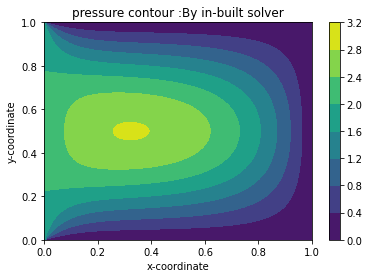

In [20]:
fig=plt.figure()
ax=plt.axes()
q=ax.contourf(X,Y,P)
plt.title('pressure contour :By in-built solver')
# plt.legend()
ax.set_xlabel('x-coordinate')
ax.set_ylabel('y-coordinate')
plt.colorbar(q)
plt.show()


Plotting pressure contour solved by SOR iterative solver:

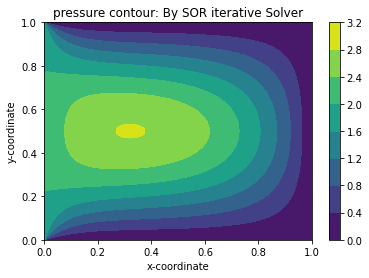

In [21]:
fig=plt.figure()
ax=plt.axes()
q=ax.contourf(X,Y,Q)
plt.title('pressure contour: By SOR iterative Solver')
# plt.legend()
ax.set_xlabel('x-coordinate')
ax.set_ylabel('y-coordinate')
plt.colorbar(q)
plt.show()
